In [1]:
import pandas as pd
import torch
from sklearn.model_selection import train_test_split

pv_ori = pd.read_csv('./processed_data/pv/week_2021_PV.csv', index_col = 0)
net_ori = pd.read_csv('./processed_data/netload/RISE_week_2021_netload.csv', index_col=0 )

In [2]:
# pv와 net index의 intersection인 load_index
load_index = pv_ori.index.intersection(net_ori.index)
pv = pv_ori.reindex(load_index)
net = net_ori.reindex(load_index)

In [3]:
# load_index에 월별로 며칠씩 있는지 확인하기 위한 코드
# cnt_arr가 월별 일 수를 저장
cnt_arr = []
for i in range(1, 13):
    cnt = 0
    for idx in load_index:
        if '21{0:0>2}'.format(i) in str(idx):
            cnt+=1
    cnt_arr.append(cnt)
    
print('the number of days per month: ',cnt_arr)
print('sum of the days:',sum(cnt_arr))

the number of days per month:  [18, 17, 22, 21, 19, 15, 22, 21, 21, 19, 21, 18]
sum of the days: 234


[Text(0, 0, '1'),
 Text(18, 0, '2'),
 Text(35, 0, '3'),
 Text(57, 0, '4'),
 Text(78, 0, '5'),
 Text(97, 0, '6'),
 Text(112, 0, '7'),
 Text(134, 0, '8'),
 Text(155, 0, '9'),
 Text(176, 0, '10'),
 Text(195, 0, '11'),
 Text(216, 0, '12')]

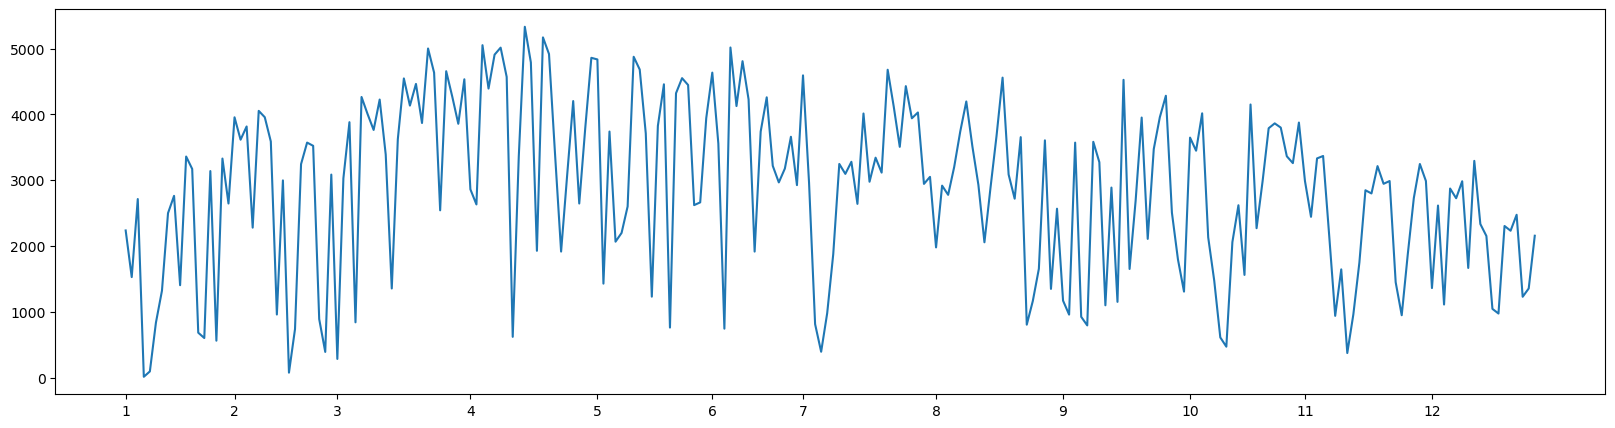

In [4]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


pv_tnsr = torch.FloatTensor(pv.values)


label_interval = [18, 17, 22, 21, 19, 15, 22, 21, 21, 19, 21, 18]
data = torch.sum(pv_tnsr, axis=1).detach().numpy().reshape(-1)


# Create figure and plot the data
fig = plt.figure(figsize=(20,5))
ax = plt.axes()
ax.plot(data)

# Set the x-tick positions and labels
x_ticks = []
x_labels = []
for i, interval in enumerate(label_interval):
    start = sum(label_interval[:i])
    x_ticks.append(start)
    x_labels.append(f'{i+1}')

ax.set_xticks(x_ticks)
ax.set_xticklabels(x_labels)


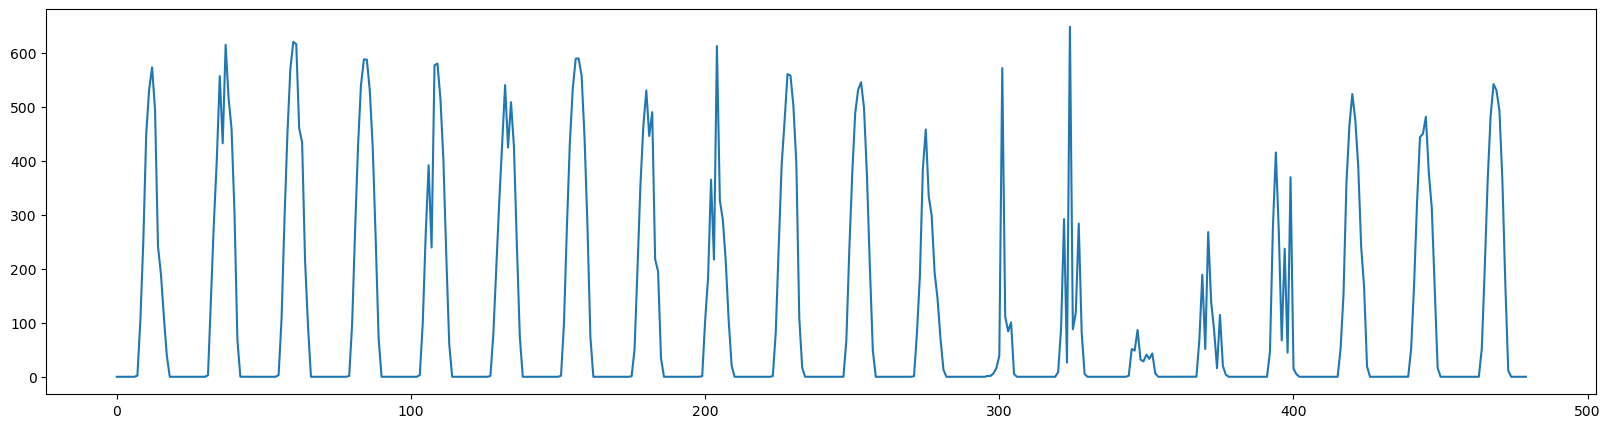

In [5]:
# 211020 ~ 211117 pv 분포

plt.figure(figsize=(20,5))
data = pv_tnsr[188:208].detach().numpy().reshape(-1)
plt.plot(data)

In [6]:
df = pv + net

In [9]:
X = df.iloc[0:233,:]
Y = df.iloc[1:234,:]
# X: 210104-211229, Y: 210105-211230 / 233x24

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, train_size=0.8, shuffle=False)

x_train_tnsr = torch.FloatTensor(x_train.values)
y_train_tnsr = torch.FloatTensor(y_train.values)